# TGFBR2
TGFBR2 codes for Transforming Growth Factor Beta Receptor 2, a transmembrane protein that has a protein kinase domain and forms a heterodimeric complex with TGF-beta receptor type-1. This complex binds TGF-beta.

In [1]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-12-12
Using gpsea version 0.9.2


## TGFBR2
We use the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier.

In [2]:
gene_symbol = 'TGFBR2'
mane_tx_id = 'NM_003242.6'
mane_protein_id = 'NP_003233.4' # TGF-beta receptor type-2 isoform B precursor

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets


phenopacket_store_release = '0.1.23' 
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
qc.summarize()

Individuals Processed: 100%|██████████| 53/53 [00:56<00:00,  1.07s/ individuals]
Validated under permissive policy
No errors or warnings were found


In [4]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

n,HPO Term
33,Aortic root aneurysm
26,Arachnodactyly
25,Joint hypermobility
23,Scoliosis
20,Arterial tortuosity
20,Bifid uvula
19,Epicanthus
19,Malar flattening
16,High palate
15,Disproportionate tall stature


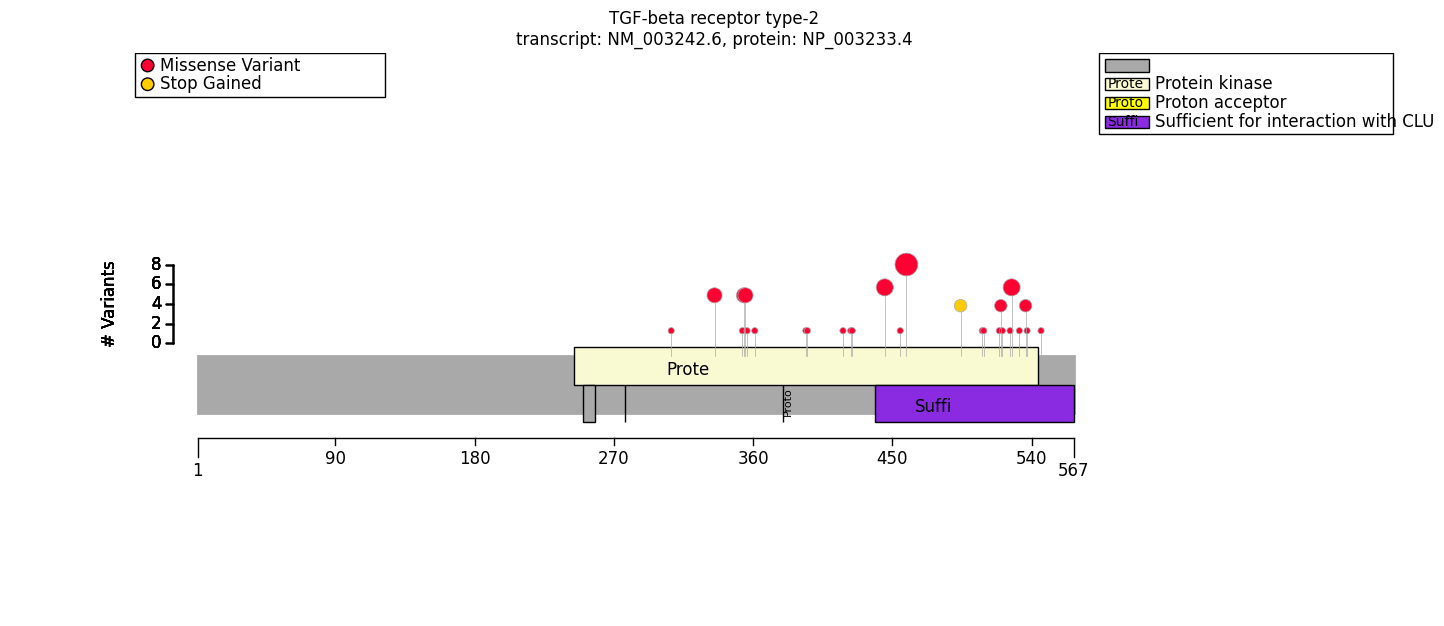

In [5]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

tgfbr2_fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
tgfbr2_fig.tight_layout()

In [6]:
from gpsea.view import ProteinVariantViewer
pvv = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pvv.process(cohort=cohort)

Count,Name,Type,Coordinates,Variants
48,Protein kinase,Domain,245 - 544,p.Leu395Pro; p.Gly357Trp; p.Cys396Tyr; p.Arg528His; p.Asp522Asn; p.Ile510Ser; p.Asp446Asn; p.Cys520Phe; p.Glu456Lys; p.Ala355Pro; p.Arg460Cys; p.His362Tyr; p.Met425Val; p.Arg460Gly; p.Arg356Pro; p.Asp446Tyr; p.Leu308Pro; p.Trp521Arg; p.Cys533Phe; p.Gly509_Ile510delinsValPhe; p.Arg537Cys; p.Val419Leu; p.Leu354Pro; p.Arg495Ter; p.Arg460His; p.Phe538Ser; p.Tyr424Asp; p.Ala527Thr; p.Tyr336Asn; p.Arg528Cys
0,,Binding site,251 - 258,
0,,Binding site,278 - 277,
0,Proton acceptor,Active site,380 - 379,
31,Sufficient for interaction with CLU,Region,440 - 567,p.Arg528His; p.Asp522Asn; p.Ile510Ser; p.Asp446Asn; p.Cys520Phe; p.Glu456Lys; p.Arg460Cys; p.Arg460Gly; p.Asp446Tyr; p.Trp521Arg; p.Cys533Phe; p.Gly509_Ile510delinsValPhe; p.Arg537Cys; p.Arg495Ter; p.Arg460His; p.Phe538Ser; p.Ala527Thr; p.Leu547Pro; p.Arg528Cys


In [7]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Count,Variant key,HGVS,Overlapping Exons,Effects
6,3_30674228_30674228_C_T,c.1378C>T (p.Arg460Cys),5,missense
3,3_30691477_30691477_C_T,c.1582C>T (p.Arg528Cys),7,missense
3,3_30672246_30672246_G_C,c.1063G>C (p.Ala355Pro),4,missense
3,3_30672189_30672189_T_A,c.1006T>A (p.Tyr336Asn),4,missense
3,3_30672250_30672250_G_C,c.1067G>C (p.Arg356Pro),4,missense
2,3_30691456_30691456_T_C,c.1561T>C (p.Trp521Arg),7,missense
2,3_30691504_30691504_C_T,c.1609C>T (p.Arg537Cys),7,missense
2,3_30674186_30674186_G_T,c.1336G>T (p.Asp446Tyr),5,missense
2,3_30674186_30674186_G_A,c.1336G>A (p.Asp446Asn),5,missense
2,3_30644921_30644921_C_T,c.263+6C>T (-),-,"splice donor, intronic"


## Genotype-Phenotype Correlation (GPC) Analysis

In [8]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
from gpsea.analysis.clf import prepare_classifiers_for_terms_of_interest

analysis = configure_hpo_term_analysis(hpo)
pheno_clfs = prepare_classifiers_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [9]:
from gpsea.view import MtcStatsViewer
from gpsea.analysis.predicate import protein_feature
from gpsea.analysis.clf import monoallelic_classifier


clu = protein_feature(feature_id="Sufficient for interaction with CLU", protein_metadata=protein_meta)

clu_clf = monoallelic_classifier(
    a_predicate=clu,
    b_predicate=~clu,
    a_label="CLU interaction region",
    b_label="Other")
clu_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=clu_clf,
    pheno_clfs=pheno_clfs,
)

viewer = MtcStatsViewer()
viewer.process(clu_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,30
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,66
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,193


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=clu_result)

Allele group                                       CLU interaction region  \
                                                                    Count   
Malar flattening [HP:0000272]                                        6/19   
Dural ectasia [HP:0100775]                                           2/17   
Exotropia [HP:0000577]                                                0/9   
Scoliosis [HP:0002650]                                               9/20   
Pectus excavatum [HP:0000767]                                        9/14   
Epicanthus [HP:0000286]                                             13/18   
Bifid uvula [HP:0000193]                                             8/18   
Joint hypermobility [HP:0001382]                                    14/16   
Disproportionate tall stature [HP:0001519]                           8/12   
Arachnodactyly [HP:0001166]                                         13/24   
Aortic root aneurysm [HP:0002616]                                   17/20   
Dermal translucency [HP:0010648]                                     5/10   
Arterial tortuosity [HP:0005116]                                    13/16   
Mitral valve prolapse [HP:0001634]                                   7/16   
High palate [HP:0000218]                                            11/17   
Abnormal palate morphology [HP:0000174]                             18/18   
Abnormal oral cavity morphology [HP:0000163]                        18/18   
Abnormal axial skeleton morphology [HP:0009121]                     20/20   
Abnormal mandible morphology [HP:0000277]                           10/10   
Abnormal facial skeleton morphology [HP:0011821]                    12/12   
Abnormal curvature of the vertebral column [HP:...                    9/9   
Abnormality of the vertebral column [HP:0000925]                    12/12   
Long fingers [HP:0100807]                                           13/13   
Abnormal finger morphology [HP:0001167]                             16/16   
Abnormal digit morphology [HP:0011297]                              16/16   
Abnormal appendicular skeleton morphology [HP:0...                  17/17   
Slender finger [HP:0001238]                                         13/13   
Dilatation of the cerebral artery [HP:0004944]                       7/14   
Abnormal systemic arterial morphology [HP:0011004]                  28/28   
Abnormal blood vessel morphology [HP:0033353]                       29/29   
Vascular dilatation [HP:0002617]                                    23/23   
Thoracic aortic aneurysm [HP:0012727]                               17/17   
Abnormal aortic morphology [HP:0001679]                             20/20   
Abnormal morphology of the great vessels [HP:00...                  20/20   
Abnormality of joint mobility [HP:0011729]                          15/15   
Talipes equinovarus [HP:0001762]                                     6/12   
Vascular tortuosity [HP:0004948]                                    13/13   

Allele group                                                Other          \
                                                   Percent  Count Percent   
Malar flattening [HP:0000272]                          32%  13/15     87%   
Dural ectasia [HP:0100775]                             12%    4/7     57%   
Exotropia [HP:0000577]                                  0%   6/13     46%   
Scoliosis [HP:0002650]                                 45%  14/18     78%   
Pectus excavatum [HP:0000767]                          64%   3/11     27%   
Epicanthus [HP:0000286]                                72%   6/12     50%   
Bifid uvula [HP:0000193]                               44%  12/18     67%   
Joint hypermobility [HP:0001382]                       88%  11/16     69%   
Disproportionate tall stature [HP:0001519]             67%   7/15     47%   
Arachnodactyly [HP:0001166]                            54%  13/20     65%   
Aortic root aneurysm [HP:0002616]                      85%  16/17     94

In [11]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate import variant_effect

missense = variant_effect(effect=VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_clf =monoallelic_classifier(
    a_predicate=missense,
    b_predicate=~missense,
    a_label="Missense",
    b_label="Other")
missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=missense_clf,
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       Missense         Other  \
                                                      Count Percent Count   
Aortic root aneurysm [HP:0002616]                     31/33     94%   2/4   
Mitral valve prolapse [HP:0001634]                    10/28     36%   3/3   
Dural ectasia [HP:0100775]                             3/19     16%   3/5   
Arterial tortuosity [HP:0005116]                      20/24     83%   3/6   
Scoliosis [HP:0002650]                                18/33     55%   5/5   
Talipes equinovarus [HP:0001762]                      11/21     52%   0/3   
Disproportionate tall stature [HP:0001519]            12/24     50%   3/3   
Malar flattening [HP:0000272]                         18/30     60%   1/4   
Bifid uvula [HP:0000193]                              19/32     59%   1/4   
Pectus excavatum [HP:0000767]                         11/20     55%   1/5   
Epicanthus [HP:0000286]                               17/25     68%   2/5   
Exotropia [HP:0000577]                                 5/20     25%   1/2   
Arachnodactyly [HP:0001166]                           23/38     61%   3/6   
High palate [HP:0000218]                              14/21     67%   2/3   
Abnormal palate morphology [HP:0000174]               31/31    100%   3/3   
Abnormal oral cavity morphology [HP:0000163]          31/31    100%   4/4   
Abnormal axial skeleton morphology [HP:0009121]       35/35    100%   6/6   
Abnormal mandible morphology [HP:0000277]             20/20    100%   3/3   
Abnormal facial skeleton morphology [HP:0011821]      24/24    100%   3/3   
Abnormal curvature of the vertebral column [HP:...    18/18    100%   5/5   
Abnormality of the vertebral column [HP:0000925]      21/21    100%   5/5   
Long fingers [HP:0100807]                             23/23    100%   3/3   
Abnormal finger morphology [HP:0001167]               25/25    100%   5/5   
Abnormal digit morphology [HP:0011297]                25/25    100%   5/5   
Abnormal appendicular skeleton morphology [HP:0...    28/28    100%   5/5   
Slender finger [HP:0001238]                           23/23    100%   3/3   
Dilatation of the cerebral artery [HP:0004944]        11/23     48%   3/5   
Abnormal systemic arterial morphology [HP:0011004]    43/43    100%   5/5   
Abnormal blood vessel morphology [HP:0033353]         44/44    100%   5/5   
Vascular dilatation [HP:0002617]                      38/38    100%   4/4   
Thoracic aortic aneurysm [HP:0012727]                 31/31    100%   2/2   
Abnormal aortic morphology [HP:0001679]               34/34    100%   2/2   
Abnormal morphology of the great vessels [HP:00...    34/34    100%   2/2   
Joint hypermobility [HP:0001382]                      21/27     78%   4/5   
Abnormality of joint mobility [HP:0011729]            22/22    100%   4/4   
Dermal translucency [HP:0010648]                       8/19     42%   1/3   
Vascular tortuosity [HP:0004948]                      20/20    100%   3/3   

Allele group                                                                   \
                                                   Percent Corrected p values   
Aortic root aneurysm [HP:0002616]                      50%           0.968003   
Mitral valve prolapse [HP:0001634]                    100%           0.968003   
Dural ectasia [HP:0100775]                             60%           0.968003   
Arterial tortuosity [HP:0005116]                       50%           1.000000   
Scoliosis [HP:0002650]                                100%           1.000000   
Talipes equinovarus [HP:0001762]                        0%           1.000000   
Disproportionate tall stature [HP:0001519]            100%           1.000000   
Malar flattening [HP:0000272]                          25%           1.000000   
Bifid uvula [HP:0000193]                               25%           1.000000   
Pectus excavatum [HP:0000767]                          20%           1.000000   
Epicanthus [HP:0000286] 

In [12]:
from gpsea.analysis.clf import sex_classifier

mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_clf=sex_classifier(),
    pheno_clfs=pheno_clfs,
)
summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex                                                FEMALE           MALE  \
                                                    Count Percent  Count   
Arachnodactyly [HP:0001166]                         15/19     79%  11/25   
Talipes equinovarus [HP:0001762]                     3/13     23%   8/11   
Bifid uvula [HP:0000193]                             8/20     40%  12/16   
Dilatation of the cerebral artery [HP:0004944]       3/12     25%  11/16   
Disproportionate tall stature [HP:0001519]           4/12     33%  11/15   
Epicanthus [HP:0000286]                              6/13     46%  13/17   
Dermal translucency [HP:0010648]                     6/12     50%   3/10   
Scoliosis [HP:0002650]                               8/15     53%  15/23   
Pectus excavatum [HP:0000767]                        5/12     42%   7/13   
Mitral valve prolapse [HP:0001634]                   6/13     46%   7/18   
High palate [HP:0000218]                             7/11     64%   9/13   
Abnormal palate morphology [HP:0000174]             16/16    100%  18/18   
Abnormal oral cavity morphology [HP:0000163]        17/17    100%  18/18   
Abnormal axial skeleton morphology [HP:0009121]     18/18    100%  23/23   
Abnormal mandible morphology [HP:0000277]             9/9    100%  14/14   
Abnormal facial skeleton morphology [HP:0011821]    12/12    100%  15/15   
Abnormal curvature of the vertebral column [HP:...    8/8    100%  15/15   
Abnormality of the vertebral column [HP:0000925]    10/10    100%  16/16   
Long fingers [HP:0100807]                           15/15    100%  11/11   
Abnormal finger morphology [HP:0001167]             15/15    100%  15/15   
Abnormal digit morphology [HP:0011297]              15/15    100%  15/15   
Abnormal appendicular skeleton morphology [HP:0...  17/17    100%  16/16   
Slender finger [HP:0001238]                         15/15    100%  11/11   
Abnormal systemic arterial morphology [HP:0011004]  19/19    100%  29/29   
Abnormal blood vessel morphology [HP:0033353]       20/20    100%  29/29   
Vascular dilatation [HP:0002617]                    15/15    100%  27/27   
Aortic root aneurysm [HP:0002616]                   12/13     92%  21/24   
Thoracic aortic aneurysm [HP:0012727]               12/12    100%  21/21   
Abnormal aortic morphology [HP:0001679]             15/15    100%  21/21   
Abnormal morphology of the great vessels [HP:00...  15/15    100%  21/21   
Joint hypermobility [HP:0001382]                    11/14     79%  14/18   
Abnormality of joint mobility [HP:0011729]          12/12    100%  14/14   
Arterial tortuosity [HP:0005116]                    11/14     79%  12/16   
Vascular tortuosity [HP:0004948]                    11/11    100%  12/12   
Malar flattening [HP:0000272]                       10/18     56%   9/16   

Sex                                                                            \
                                                   Percent Corrected p values   
Arachnodactyly [HP:0001166]                            44%           0.401834   
Talipes equinovarus [HP:0001762]                       73%           0.401834   
Bifid uvula [HP:0000193]                               75%           0.401834   
Dilatation of the cerebral artery [HP:0004944]         69%           0.401834   
Disproportionate tall stature [HP:0001519]             73%           0.401834   
Epicanthus [HP:0000286]                                76%           0.771281   
Dermal translucency [HP:0010648]                       30%           1.000000   
Scoliosis [HP:0002650]                                 65%           1.000000   
Pectus excavatum [HP:0000767]                          54%           1.000000   
Mitral valve prolapse [HP:0001634]                     39%           1.000000   
High palate [HP:0000218]                               69%           1.000000   
Abnormal palate morphology [HP:0000174]               100%           1.000000   
Abnormal oral cavity morphology [HP:0000163]         

# Summary

In [13]:
from gpseacs.report import GpseaAnalysisReport, GPAnalysisResultSummary

f_results = (
    GPAnalysisResultSummary.from_mono(
        result=clu_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=missense_result,
    ),
    GPAnalysisResultSummary.from_mono(
        result=mf_result,
    )
)

caption = "No statistically significant results identified."
report = GpseaAnalysisReport(name=gene_symbol, 
                             cohort=cohort, 
                             fet_results=f_results,
                             gene_symbol=gene_symbol,
                             mane_tx_id=mane_tx_id,
                             mane_protein_id=mane_protein_id,
                             caption=caption)

In [14]:
from gpseacs.report import GpseaNotebookSummarizer
summarizer = GpseaNotebookSummarizer(hpo=hpo, gpsea_version=gpsea.__version__)
summarizer.summarize_report(report=report)

Genotype (A),Genotype (B),Tests performed,Significant tests
CLU interaction region,Other,37,0
Genotype (A),Genotype (B),Tests performed,Significant tests
Missense,Other,37,0
Genotype (A),Genotype (B),Tests performed,Significant tests
FEMALE,MALE,35,0


In [15]:
summarizer.process_latex(report=report, protein_fig=tgfbr2_fig)

Figure saved to ../../supplement/img/TGFBR2_protein_diagram-draft.pdf
Output to ../../supplement/tex/TGFBR2_summary_draft.tex
